# Examples for DA functionalities

This notebook gives an overview of python functions implemented for the analysis of dynamic aperture data from SixDesk.

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sixdesk.da import * 

# Dynamic aperture vs. angle from SixDeskDB
## Loading the data

This assumes that the sixdeskdb was already populated with the DA data:

    ./sixdb database.db da

Load the data using the davsang class from the sixdesk module. 

In [2]:
data = davsang('HLLHC_col_B_1_MBH10M_1', directory = '/home/phermes/development/SixDeskDB/')

We can check the basic properties of the study. Let's look at the emittance used and  what value the maximum da in the SixDesk scan was set to.

In [3]:
print('emit={0}, maxda={1}'.format(data.emit, data.max_da))

emit=2.5, maxda=16


In [4]:
data.dynap.head()

,seed,angle,da
0,1.0,7.5,13.034521
1,2.0,7.5,13.624918
2,3.0,7.5,13.843194
3,4.0,7.5,13.862092
4,5.0,7.5,13.754070


In [5]:
data.dasum.head()

,angle,minda,maxda,avgda
0,7.5,13.034521,14.137371,13.713896
1,15.0,13.103471,14.255875,13.748608
2,22.5,13.103462,14.317018,13.935158
3,30.0,14.230091,14.743193,14.494911
4,37.5,13.724180,15.388954,14.955695


The davsang class checks the integrety of the data, throwing an error message if it is corrupted:


In [6]:
data = davsang('HLLHC_col_B_1_MBH10M_0', directory = '/home/phermes/development/SixDeskDB/')

Found 2 bad jobs for study HLLHC_col_B_1_MBH10M_0
All bad seeds are saved in self.badseeds


## Plot the data

The plotDA functionality can be used to perform standardized plots of the DA. The upper and lower bounds of the error bars correspond to the max./min DA that was simulated for the given angle. The bullet corresponds to the mean value of the DA.

In [7]:
data = davsang('HLLHC_col_B_1_MBH10M_1', directory = '/home/phermes/development/SixDeskDB/')

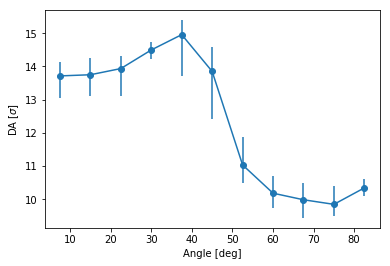

In [8]:
data.plotDA()
plt.show()

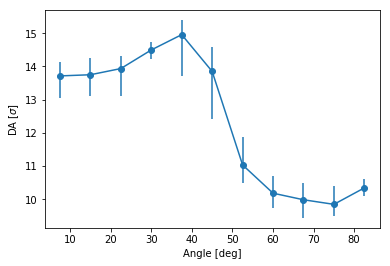

In [9]:
fig = plt.figure(figsize=[6,4])
ax1 = fig.add_subplot(111)
data.plotDA(axis=ax1)
plt.show()

# Dynamic aperture vs. turn from SixDeskDB

The functionality for the fitting is provided by the davst class in the sixdesk module.

## Plot the DA vs. turn Data from SixDeskDB

In [10]:
a = davst('/home/phermes/development/SixDeskDB/chromB2_QP_0_OC_0.db')

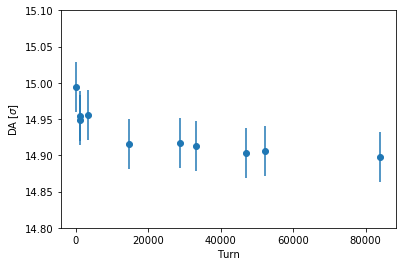

In [11]:
a.plot_simulated_davst(seed=5)
plt.ylim(14.8,15.1)
plt.show()

## Perform the fitting for one seed
Fit the data and get back the fit parameters

In [12]:
_,d,b,k,exda = a.fit_single_seed(-5,5,0.5,5)

Plot the data together with the fit

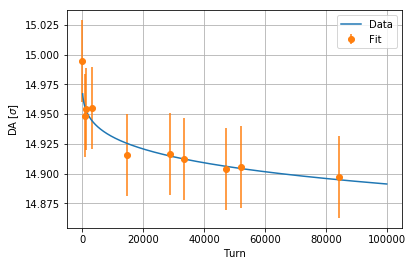

In [19]:
x = np.arange(100,100000,100)
plt.plot(x,a.dafunction(x,d,b,k),label='Data')
a.plot_simulated_davst(seed=5)
plt.legend()
plt.grid()
plt.show()

Plot data and fit for 30 minutes (20241900 turns)

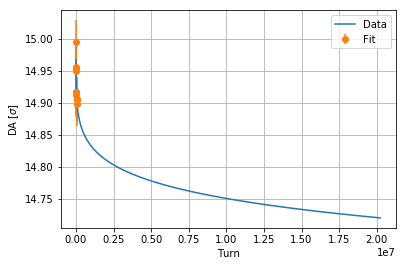

In [21]:
x = np.arange(100,20241900,100)
plt.plot(x,a.dafunction(x,d,b,k),label='Data')
a.plot_simulated_davst(seed=5)
plt.legend()
plt.grid()
plt.show()

## Perform the fitting for all seeds

In [50]:
a  = davst('/home/phermes/development/SixDeskDB/chromB2_QP_0_OC_0.db')
df = a.fitda(1,10,0.5,steps=1,verbose=False)

We get back a table including the fit parameters for the individual seeds

In [46]:
df.head()

,seed,d,b,k,exda
0,1,13.540322,5.067846,1.0,14.233953
1,2,13.328586,5.916844,1.0,14.138419
2,3,13.249325,5.786488,1.0,14.041317
3,4,13.763293,4.476519,1.0,14.375990
4,5,13.452335,5.157359,1.0,14.158218


Now we can do all kinds of statistics, histograms, etc. for the fit parameters and the extrapolated DA

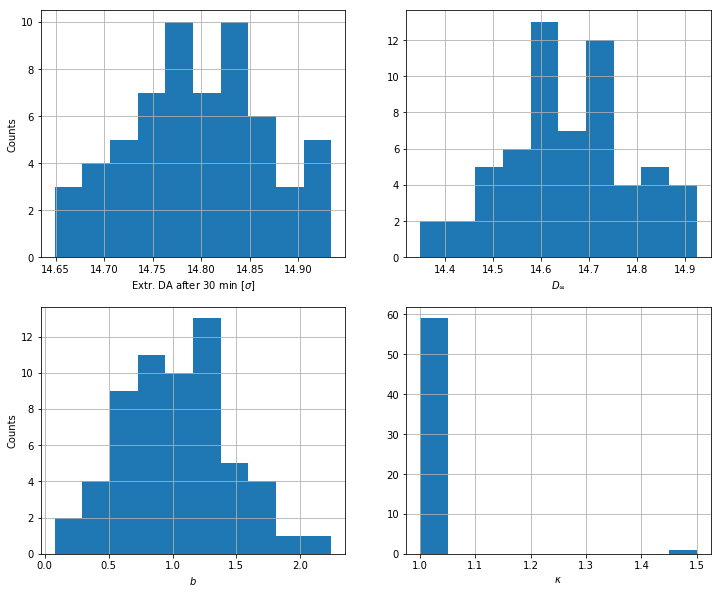

In [51]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

df.exda.hist(ax=ax1,bins=10)
df.d.hist(ax=ax2,bins=10)
df.b.hist(ax=ax3,bins=10)
df.k.hist(ax=ax4,bins=10)

ax1.set_xlabel(r'Extr. DA after 30 min [$\sigma$]')
ax2.set_xlabel(r'$D_\infty$')
ax3.set_xlabel(r'$b$')
ax4.set_xlabel(r'$\kappa$')
ax3.set_ylabel(r'Counts')
ax1.set_ylabel('Counts')

plt.show()

## Analyze a set of studies

Example: how does the extrapolated DA after 30min evolve with increasing octupole current?

In [74]:
data = []
for ioct in range(0,44,4):
    _dbname = '/home/phermes/development/SixDeskDB/chromB2_QP_0_OC_{0}.db'.format(ioct)
    a  = davst(_dbname)
    df = a.fitda(1,10,0.5,steps=1,verbose=False)
    data.append([ioct, df.exda.min(), df.exda.max(), df.exda.mean()])
data = pd.DataFrame(data,columns=['ioct','minda','maxda','meanda'])

In [73]:
data.head()

,ioct,minda,maxda,meanda
0,0,14.649165,14.934160,14.797925
1,4,13.750822,14.349882,14.002430
2,8,11.917200,13.676935,12.962609
3,12,11.903029,13.828452,12.972118
4,16,10.466454,11.808988,11.097923


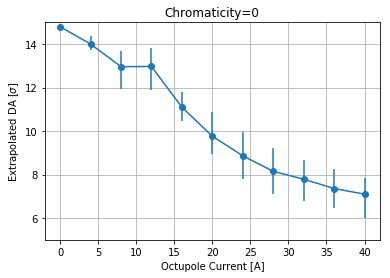

In [72]:
plt.errorbar(data.ioct,data.meanda,yerr=(data.meanda-data.minda,data.maxda-data.meanda),fmt='o-')
plt.ylim(5,15)
plt.xlabel('Octupole Current [A]')
plt.ylabel(r'Extrapolated DA [$\sigma$]')
plt.grid()
plt.title('Chromaticity=0')
plt.show()